In [25]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'data/UNR-IDD.csv'
dataset = pd.read_csv(file_path)

dataset_info = {
    "Shape": dataset.shape,
    "Columns": dataset.columns.tolist(),
    "Missing Values": dataset.isnull().sum().to_dict(),
    "Preview": dataset.head().to_dict(orient="records")
}

dataset_info

{'Shape': (37411, 34),
 'Columns': ['Switch ID',
  'Port Number',
  'Received Packets',
  'Received Bytes',
  'Sent Bytes',
  'Sent Packets',
  'Port alive Duration (S)',
  'Packets Rx Dropped',
  'Packets Tx Dropped',
  'Packets Rx Errors',
  'Packets Tx Errors',
  'Delta Received Packets',
  'Delta Received Bytes',
  'Delta Sent Bytes',
  'Delta Sent Packets',
  'Delta Port alive Duration (S)',
  'Delta Packets Rx Dropped',
  ' Delta Packets Tx Dropped',
  'Delta Packets Rx Errors',
  'Delta Packets Tx Errors',
  'Connection Point',
  'Total Load/Rate',
  'Total Load/Latest',
  'Unknown Load/Rate',
  'Unknown Load/Latest',
  'Latest bytes counter',
  'is_valid',
  'Table ID',
  'Active Flow Entries',
  'Packets Looked Up',
  'Packets Matched',
  'Max Size',
  'Label',
  'Binary Label'],
 'Missing Values': {'Switch ID': 0,
  'Port Number': 0,
  'Received Packets': 0,
  'Received Bytes': 0,
  'Sent Bytes': 0,
  'Sent Packets': 0,
  'Port alive Duration (S)': 0,
  'Packets Rx Dropped': 

1. Received Packets:
- Total jumlah paket data yang diterima oleh port dalam jaringan.
- Contohnya: Jika ada 100 perangkat yang mengirim data, port akan menerima sejumlah paket yang mencerminkan komunikasi ini.
2. Sent Packets:
- Total jumlah paket data yang dikirim dari port ke tujuan.
- Ini menggambarkan aktivitas pengiriman data dari port.

3. Received Bytes:

- Total jumlah byte data yang diterima (ukuran data dalam satuan byte).
- Semakin banyak data yang dikirim ke port, semakin tinggi nilai ini.

4. Sent Bytes:
- Total byte data yang dikirim keluar dari port.
- Menunjukkan volume data yang dihasilkan atau diteruskan oleh port.
5. Port alive Duration (S):
- Waktu (dalam detik) selama port aktif atau terhubung dalam jaringan.
- Berguna untuk mengetahui durasi koneksi atau aktivitas port.
6. Packets Rx Dropped:
- Jumlah paket yang gagal diterima oleh port karena masalah seperti kesalahan jaringan.
- Idealnya, nilai ini nol menunjukkan jaringan yang sehat.
7. Packets Tx Dropped:
- Jumlah paket yang gagal dikirim oleh port.
- Masalah ini biasanya disebabkan oleh kemacetan atau buffer penuh.
8. Delta Received Packets:
- Perubahan jumlah paket yang diterima selama periode tertentu.
- Berguna untuk melihat lonjakan lalu lintas yang tidak biasa.
9. Delta Received Bytes:
- Perubahan dalam jumlah byte yang diterima selama periode tertentu.
- Membantu mendeteksi pola perubahan ukuran data.
10. Delta Sent Bytes:
- Perubahan jumlah byte yang dikirim selama periode tertentu.
- Bisa mencerminkan aktivitas burst atau serangan DDoS.
11. Delta Sent Packets:
- Perubahan jumlah paket yang dikirim selama periode tertentu.
- Membantu mendeteksi aktivitas jaringan yang tidak wajar.
12. Connection Point:
- Menunjukkan titik koneksi jaringan (misalnya, nomor port).
- Berguna untuk mengidentifikasi lokasi spesifik dalam jaringan.
13. Total Load/Rate dan Total Load/Latest:
- Menggambarkan tingkat atau jumlah total beban jaringan.
- Beban tinggi dapat menunjukkan aktivitas berat, termasuk serangan.
14. Unknown Load/Rate dan Unknown Load/Latest:
- Beban jaringan yang tidak diketahui atau tidak terklasifikasi.
- Dapat menjadi indikasi aktivitas anomali atau serangan.
15. Label:
- Menandai jenis lalu lintas seperti Normal, PortScan, atau serangan spesifik seperti TCP-SYN.
- Memberikan informasi tentang sifat lalu lintas.
16. Binary Label:
- Versi biner dari Label, yaitu Attack (serangan) atau Normal.
- Berguna untuk klasifikasi sederhana.

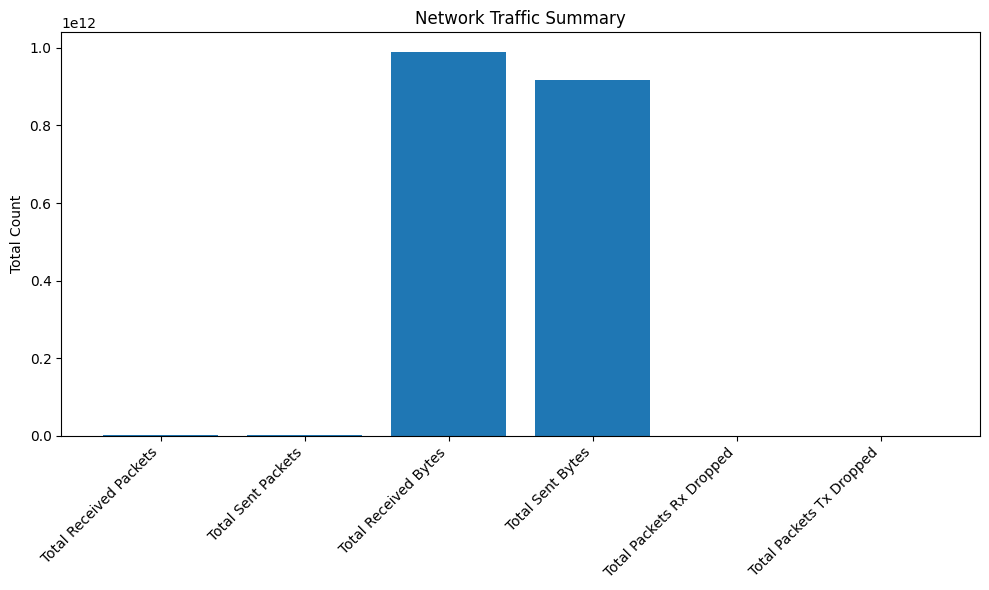

{'Total Received Packets': 808784562,
 'Total Sent Packets': 1258013113,
 'Total Received Bytes': 990452850968,
 'Total Sent Bytes': 917022945226,
 'Total Packets Rx Dropped': 0,
 'Total Packets Tx Dropped': 0}

In [26]:
traffic_summary = {
    "Total Received Packets": dataset['Received Packets'].sum(),
    "Total Sent Packets": dataset['Sent Packets'].sum(),
    "Total Received Bytes": dataset['Received Bytes'].sum(),
    "Total Sent Bytes": dataset['Sent Bytes'].sum(),
    "Total Packets Rx Dropped": dataset['Packets Rx Dropped'].sum(),
    "Total Packets Tx Dropped": dataset['Packets Tx Dropped'].sum(),
}

# Plotting a bar chart for total traffic metrics
metrics = list(traffic_summary.keys())
values = list(traffic_summary.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.title("Network Traffic Summary")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

traffic_summary

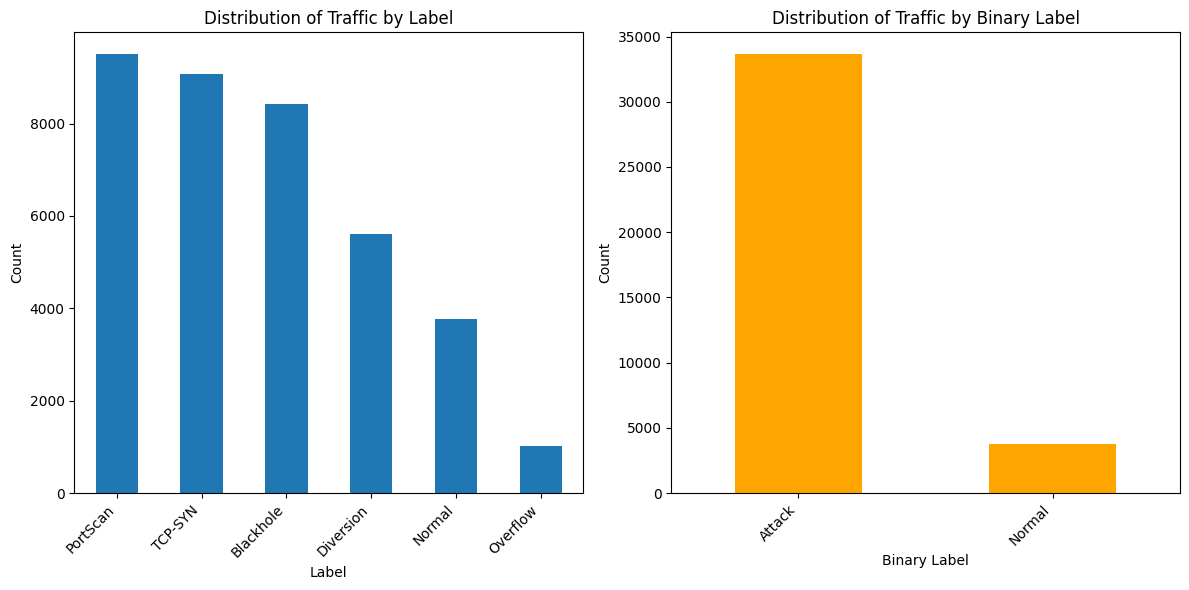

{'Label Distribution': {'PortScan': 9500,
  'TCP-SYN': 9081,
  'Blackhole': 8420,
  'Diversion': 5615,
  'Normal': 3773,
  'Overflow': 1022},
 'Binary Label Distribution': {'Attack': 33638, 'Normal': 3773}}

In [27]:
# Analyzing distribution of traffic by 'Label' and 'Binary Label'
label_distribution = dataset['Label'].value_counts()
binary_label_distribution = dataset['Binary Label'].value_counts()

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution of 'Label'
plt.subplot(1, 2, 1)
label_distribution.plot(kind='bar')
plt.title('Distribution of Traffic by Label')
plt.ylabel('Count')
plt.xlabel('Label')
plt.xticks(rotation=45, ha='right')

# Distribution of 'Binary Label'
plt.subplot(1, 2, 2)
binary_label_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Traffic by Binary Label')
plt.ylabel('Count')
plt.xlabel('Binary Label')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

label_distribution_summary = {
    "Label Distribution": label_distribution.to_dict(),
    "Binary Label Distribution": binary_label_distribution.to_dict()
}

label_distribution_summary

### Distribusi Berdasarkan Label:
    - PortScan: 9,500 kejadian
    - TCP-SYN: 9,081 kejadian
    - Blackhole: 8,420 kejadian
    - Diversion: 5,615 kejadian
    - Normal: 3,773 kejadian
    - Overflow: 1,022 kejadia 

### Distribusi Berdasarkan Binary Label:
    - Attack: 33638 kejadian (mayoritas adalah serangan)
    - Normal: 3773 kejadian

 

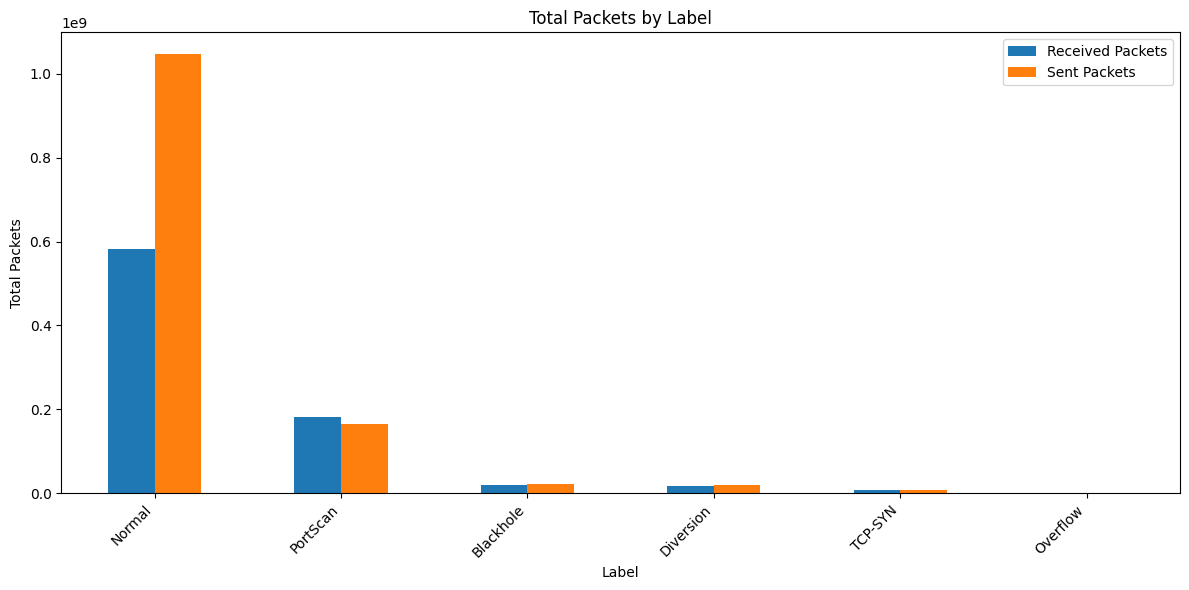

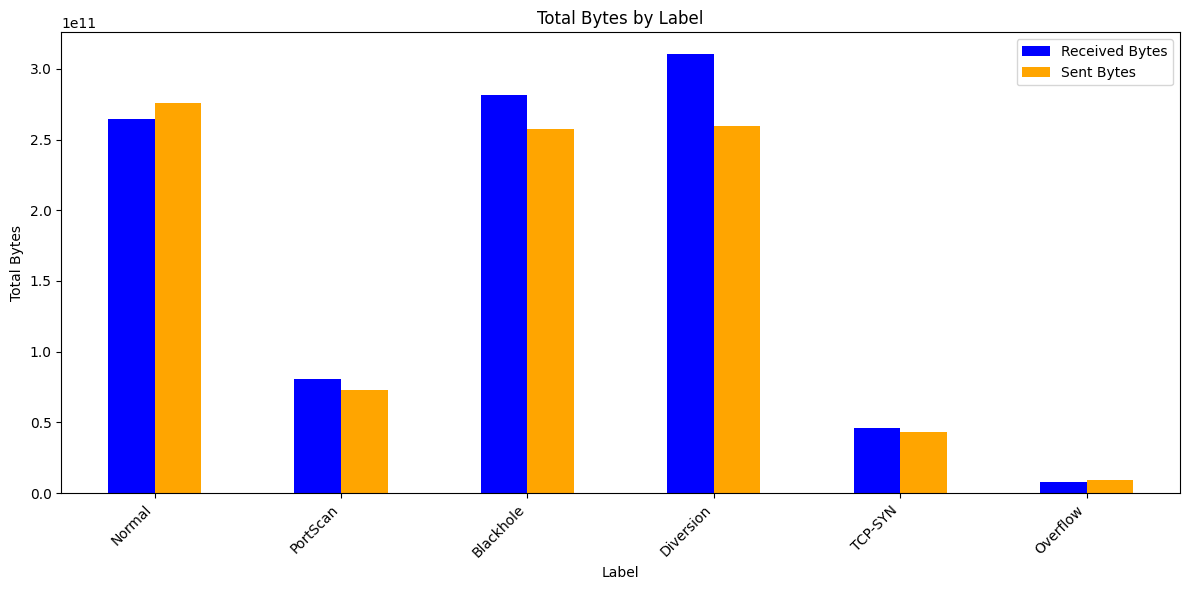

In [28]:
# Exploring traffic metrics by Label
traffic_metrics_by_label = dataset.groupby('Label').agg({
    'Received Packets': 'sum',
    'Sent Packets': 'sum',
    'Received Bytes': 'sum',
    'Sent Bytes': 'sum'
}).sort_values(by='Received Packets', ascending=False)

# Visualizing total Received and Sent Packets by Label
traffic_metrics_by_label[['Received Packets', 'Sent Packets']].plot(
    kind='bar', figsize=(12, 6), title="Total Packets by Label"
)
plt.ylabel("Total Packets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualizing total Received and Sent Bytes by Label
traffic_metrics_by_label[['Received Bytes', 'Sent Bytes']].plot(
    kind='bar', figsize=(12, 6), title="Total Bytes by Label", color=['blue', 'orange']
)
plt.ylabel("Total Bytes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1. Total Received dan Sent Packets:
    - Label Normal memiliki lalu lintas paket tertinggi untuk paket yang diterima dan dikirim.
    - Serangan seperti BlackHole dan Diversion menunjukkan jumlah paket yang signifikan, tetapi lebih rendah dari lalu lintas normal. 
2. Total Received dan Sent Bytes:
    - Lalu lintas byte tertinggi ditemukan pada serangan Diversion dan Blackhole, menunjukkan bahwa serangan ini melibatkan data berukuran besar.

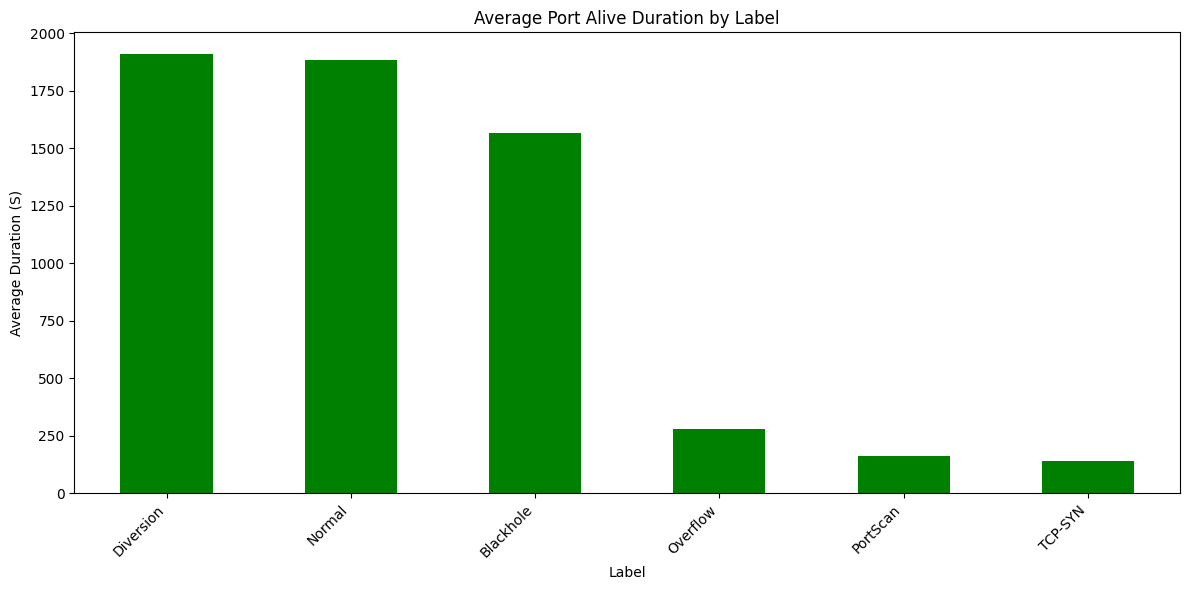

Label
Diversion    1909.526447
Normal       1884.002915
Blackhole    1565.960808
Overflow      280.884540
PortScan      160.500000
TCP-SYN       138.474838
Name: Port alive Duration (S), dtype: float64

In [29]:
# Exploring temporal patterns using 'Port alive Duration (S)' grouped by label
temporal_analysis = dataset.groupby('Label')['Port alive Duration (S)'].mean().sort_values(ascending=False)

# Visualizing average port alive duration by Label
plt.figure(figsize=(12, 6))
temporal_analysis.plot(kind='bar', color='green')
plt.title("Average Port Alive Duration by Label")
plt.ylabel("Average Duration (S)")
plt.xlabel("Label")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the numeric values
temporal_analysis


1. Durasi Port Tertinggi:
    - Diversion memiliki rata-rata durasi port aktif tertinggi (1,909 detik), diikuti oleh Normal (1,884 detik).
    - Ini menunjukkan bahwa serangan Diversion dan lalu lintas Normal cenderung berlangsung lebih lama.
2. Durasi Port Terendah:
    - TCP-SYN dan PortScan memiliki durasi port aktif terendah, masing-masing 138 detik dan 160 detik.
    - Ini menunjukkan bahwa serangan ini cenderung berlangsung dalam waktu singkat.
  

/tmp/ipykernel_55826/3347639548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


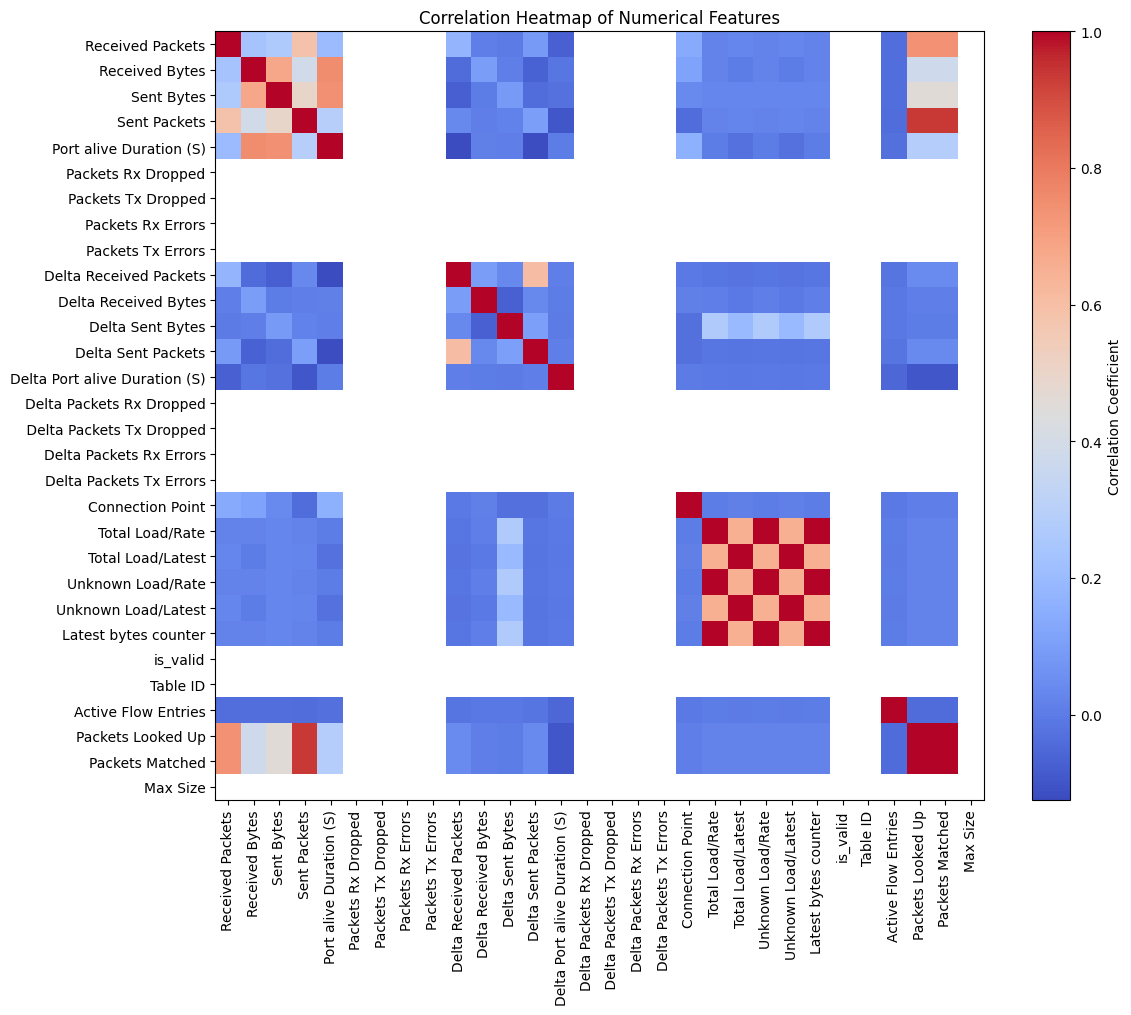

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Received Packets,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737932,0.737933
Received Bytes,NaN,1.000000,NaN,NaN,0.753177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sent Bytes,NaN,NaN,1.000000,NaN,0.744272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sent Packets,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.936095,0.936094
Port alive Duration (S),NaN,0.753177,0.744272,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Received Packets,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Received Bytes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Sent Bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Sent Packets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Port alive Duration (S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Exploring correlations among numerical features to identify key relationships
correlation_matrix = dataset.corr()

# Selecting highly correlated features (correlation > 0.7 or < -0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Visualizing the correlation heatmap
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.tight_layout()
plt.show()

# Displaying the strong correlations matrix
strong_correlations_cleaned = strong_correlations.dropna(how='all').dropna(axis=1, how='all')
strong_correlations_cleaned


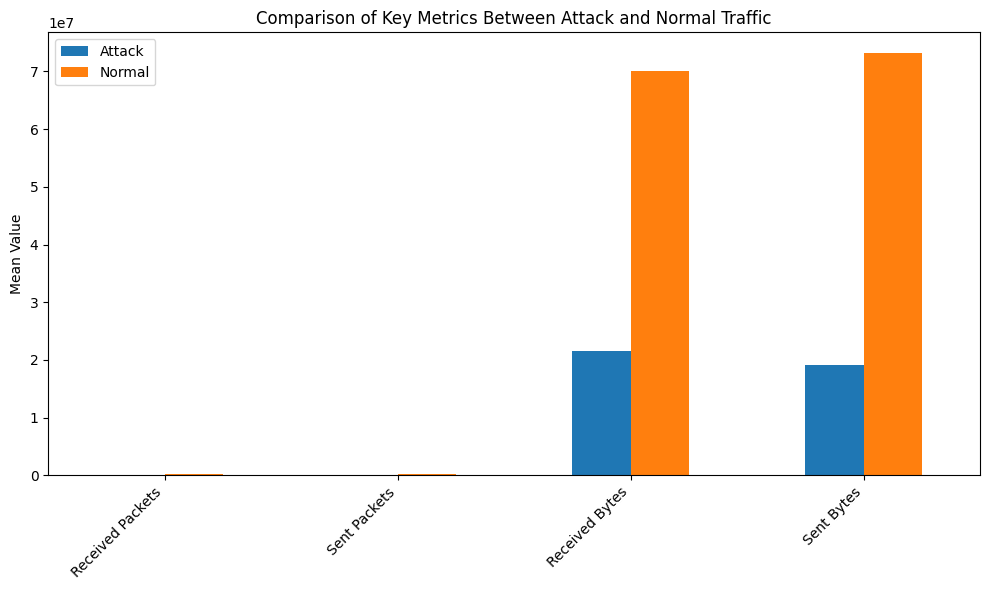

,Attack,Normal
Received Packets,6.736707e+03,1.543003e+05
Sent Packets,6.285338e+03,2.773885e+05
Received Bytes,2.158153e+07,7.010162e+07
Sent Bytes,1.906016e+07,7.311882e+07


In [31]:
# Exploring attack and normal traffic differences for key metrics
attack_traffic = dataset[dataset['Binary Label'] == 'Attack']
normal_traffic = dataset[dataset['Binary Label'] == 'Normal']

# Calculating mean values for key metrics
key_metrics = ['Received Packets', 'Sent Packets', 'Received Bytes', 'Sent Bytes']
attack_means = attack_traffic[key_metrics].mean()
normal_means = normal_traffic[key_metrics].mean()

# Plotting comparison of means
comparison_df = pd.DataFrame({
    "Attack": attack_means,
    "Normal": normal_means
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Key Metrics Between Attack and Normal Traffic")
plt.ylabel("Mean Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Displaying the numerical results
comparison_df

- Lalu lintas normal memiliki rata-rata jumlah paket dan ukuran byte yang jauh lebih tinggi dibandingkan dengan lalu lintas serangan
- Ini menunjukkan bahwa lalu lintas normal melibatkan transfer data yang lebih besar dibandingkan dengan serangan.

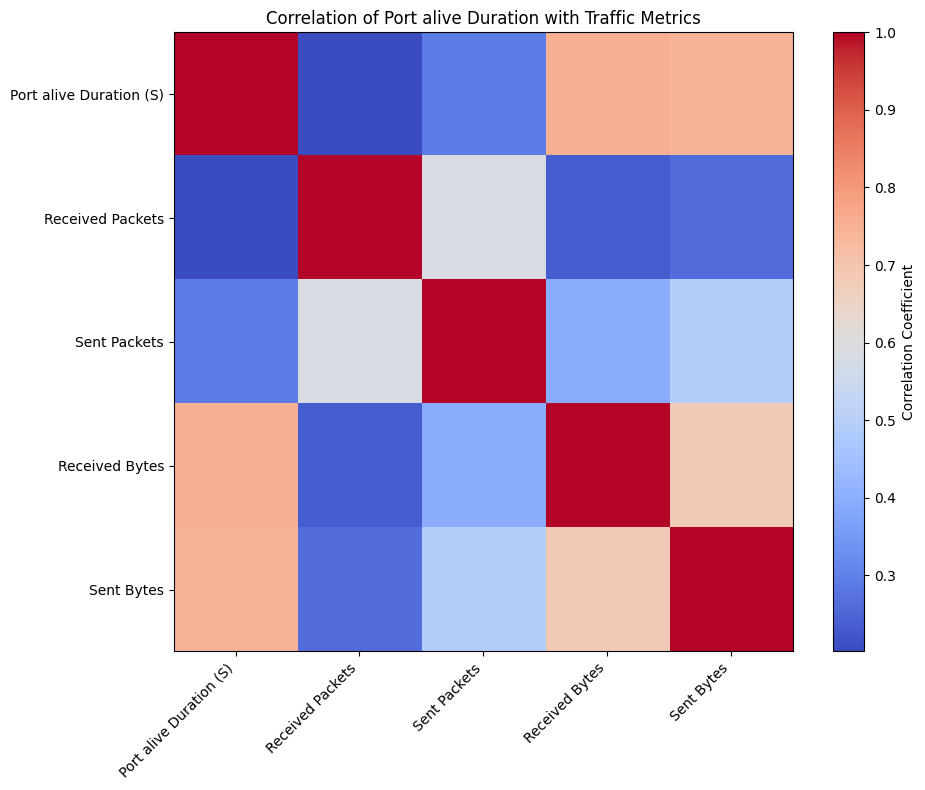

In [32]:
port_correlation = dataset[[
    'Port alive Duration (S)', 
    'Received Packets', 
    'Sent Packets', 
    'Received Bytes', 
    'Sent Bytes'
]].corr()

# Visualizing the correlation heatmap for selected metrics
plt.figure(figsize=(10, 8))
plt.imshow(port_correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation of Port alive Duration with Traffic Metrics")
plt.xticks(range(len(port_correlation.columns)), port_correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(port_correlation.index)), port_correlation.index)
plt.tight_layout()
plt.show()

1. Port alive duration (S):
    - Berkorelasi sedang dengan Received Bytes (0.75) dan Sent Bytes (0.74).
    - Menunjukkan bahwa semakin lama port aktif, semakin banyak byte yang diterima dan dikirim.
2. Received Packets:
    - Korelasi rendah dengan Port alive Duration (S) (0.20), menunjukkan jumlah paket yang diterima tidak terlalu bergantung pada durasi port aktif.
3. Sent Packets
    - Korelasi sedang dengan Port alive Duration (S) (0.29), menunjukkan hubungan lemah antara durasi aktif port dan jumlah paket yang dikirim.
4. Sent Bytes dan Received Bytes:
    - Berkorelasi sangat tinggi satu sama lain (0.68), menunjukkan hubungan linier kuat antara data yang diterima dan dikirim.

Observasi:
- Durasi port aktif memiliki pengaruh yang lebih signifikan pada jumlah byte yang diproses (Received dan Sent) dibandingkan dengan jumlah paket (Received dan Sent).
- Hubungan antara durasi port aktif dan paket yang diproses tidak terlalu kuat, menunjukkan bahwa aktivitas jaringan lebih bergantung pada skenario spesifik, bukan hanya durasi.

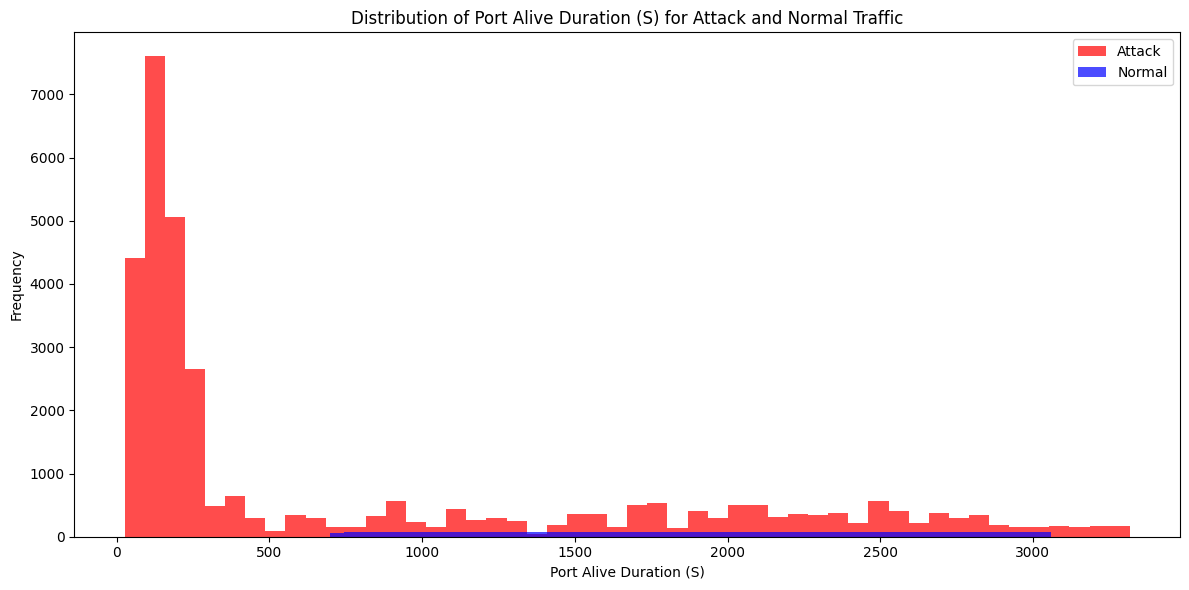

,Attack,Normal
count,33638.000000,3773.000000
mean,801.970539,1884.002915
std,950.055762,681.298715
min,26.000000,697.000000
25%,126.000000,1295.000000
50%,216.000000,1885.000000
75%,1532.000000,2477.000000
max,3317.000000,3060.000000


In [33]:
# Analyzing the distribution of traffic by 'Port alive Duration (S)' for Attack and Normal traffic
attack_port_duration = attack_traffic['Port alive Duration (S)']
normal_port_duration = normal_traffic['Port alive Duration (S)']

# Plotting histograms for Port alive Duration (S)
plt.figure(figsize=(12, 6))

# Histogram for Attack traffic
plt.hist(attack_port_duration, bins=50, alpha=0.7, label="Attack", color="red")

# Histogram for Normal traffic
plt.hist(normal_port_duration, bins=50, alpha=0.7, label="Normal", color="blue")

plt.title("Distribution of Port Alive Duration (S) for Attack and Normal Traffic")
plt.xlabel("Port Alive Duration (S)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Statistical summaries for both distributions
attack_duration_stats = attack_port_duration.describe()
normal_duration_stats = normal_port_duration.describe()

duration_summary = pd.DataFrame({
    "Attack": attack_duration_stats,
    "Normal": normal_duration_stats
})

duration_summary

1. Attack
- Rata-rata: 802 detik.
- Median: 216 detik
- Rentang: 26 hingga 3,317 detik.
- Distribusi: Mayoritas durasi serangan lebih pendek, dengan beberapa kasus durasi panjang.

2. Normal
- Rata-rata: 1,884 detik.
- Median: 1,885 detik.
- Rentang: 697 hingga 3,060 detik.
- Distribusi: Durasi port aktif lebih stabil dan cenderung lebih lama dibandingkan serangan.


### Observasi dari Grafik:
- Lalu lintas normal menunjukkan distribusi yang lebih sempit dengan durasi lebih panjang.
- Lalu lintas serangan memiliki distribusi yang lebih lebar, menunjukkan variasi besar dalam durasi serangan

<Figure size 1200x600 with 0 Axes>

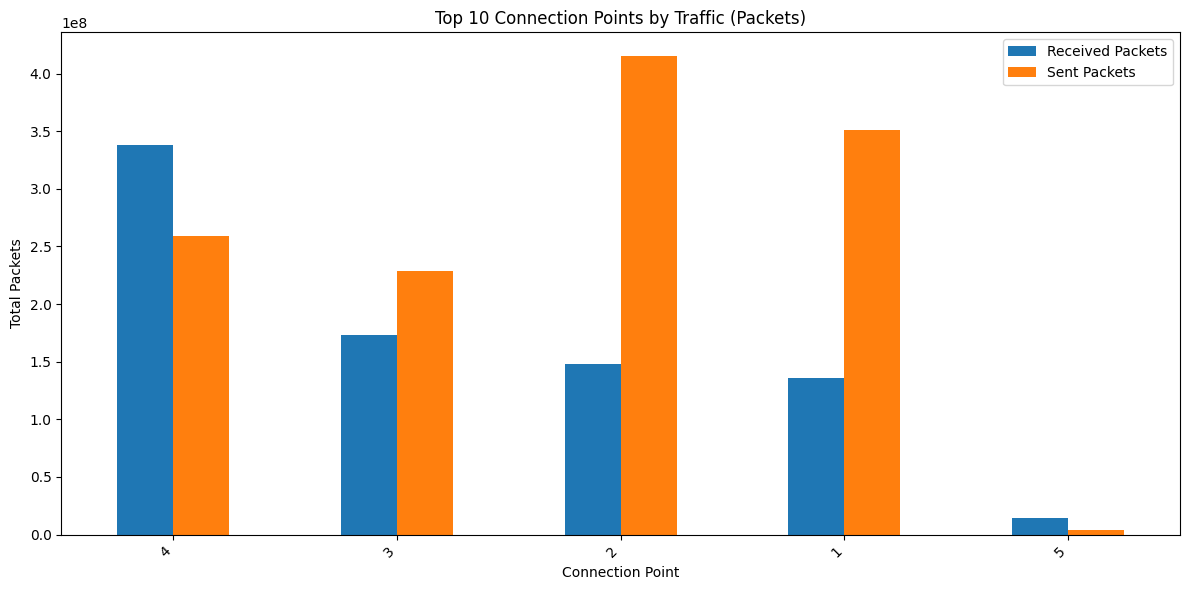

<Figure size 1200x600 with 0 Axes>

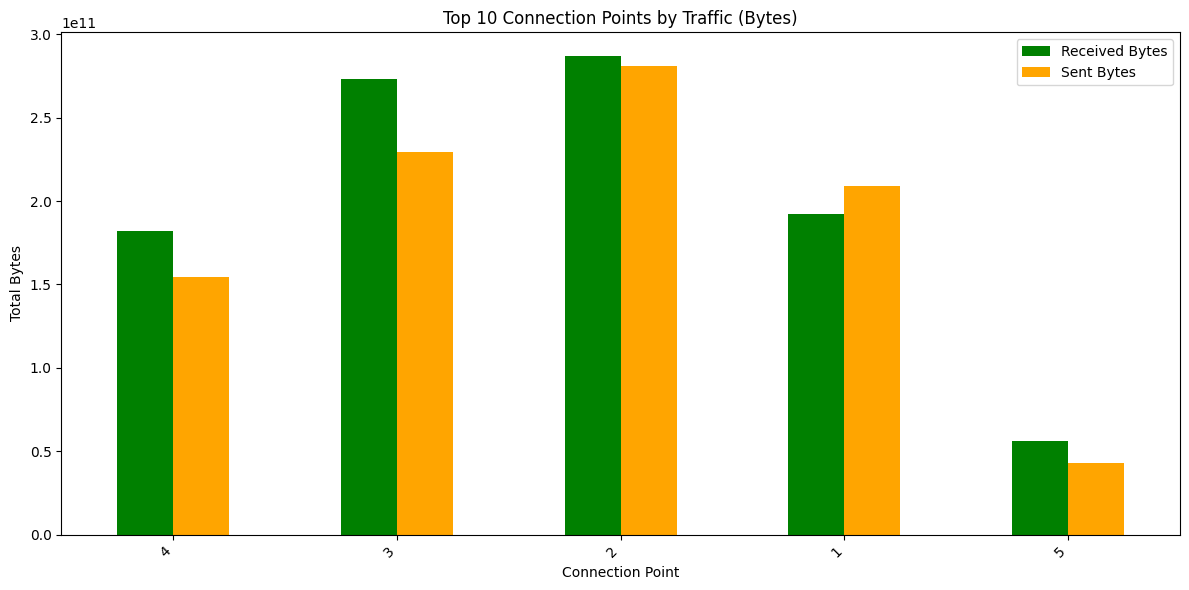

,Received Packets,Sent Packets,Received Bytes,Sent Bytes,Port alive Duration (S)
Connection Point,,,,,
4,338360284,259414031,182200126802,154305255989,1192.950398
3,172799407,228767405,273055983191,229392628247,899.374945
2,147545327,414988285,286911859046,281252737547,908.383315
1,135890011,350923303,192191254474,208897043628,694.592203
5,14189533,3920089,56093627455,43175279815,1223.098724


In [34]:
# Investigating traffic metrics by connection points (unique ports)
connection_point_metrics = dataset.groupby('Connection Point').agg({
    'Received Packets': 'sum',
    'Sent Packets': 'sum',
    'Received Bytes': 'sum',
    'Sent Bytes': 'sum',
    'Port alive Duration (S)': 'mean'
}).sort_values(by='Received Packets', ascending=False)

# Visualizing traffic by connection points
plt.figure(figsize=(12, 6))
connection_point_metrics[['Received Packets', 'Sent Packets']].head(10).plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Top 10 Connection Points by Traffic (Packets)")
plt.ylabel("Total Packets")
plt.xlabel("Connection Point")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
connection_point_metrics[['Received Bytes', 'Sent Bytes']].head(10).plot(
    kind='bar', figsize=(12, 6), color=['green', 'orange']
)
plt.title("Top 10 Connection Points by Traffic (Bytes)")
plt.ylabel("Total Bytes")
plt.xlabel("Connection Point")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


connection_point_metrics.head(10)


1. Connection Point 4:
- Received Packets: 338,360,284
- Sent Packets: 259,414,031
- Received Bytes: 182,200,126,802
- Sent Bytes: 154,305,255,989
- Average Port alive Duration: 1,192 detik.

2. Connection Point 3:
- Received Packets: 172,799,407
- Sent Packets: 228,767,405
- Received Bytes: 273,055,983,191
- Sent Bytes: 229,392,628,247
- Average Port alive Duration: 899 detik.

3. Connection Point 2:
- Received Packets: 147,545,327
- Sent Packets: 414,988,285
- Received Bytes: 286,911,859,046
- Sent Bytes: 281,252,737,547
- Average Port alive Duration: 908 detik.

4. Connection Point 1:
- Received Packets: 135,890,011
- Sent Packets: 350,923,303
- Received Bytes: 192,191,254,474
- Sent Bytes: 208,897,043,628
- Average Port alive Duration: 694 detik.

5. Connection Point 5:
- Received Packets: 14,189,533
- Sent Packets: 3,920,089
- Received Bytes: 56,093,627,455
- Sent Bytes: 43,175,279,815
- Average Port alive Duration: 1,223 detik.

Observasi:
- Connection Point 4 memiliki jumlah paket dan durasi rata-rata tertinggi.
- Connection Point 3 dan 2 memiliki volume data (bytes) tertinggi.
- Rata-rata durasi port aktif cukup beragam, tergantung pada traffic pada connection point.

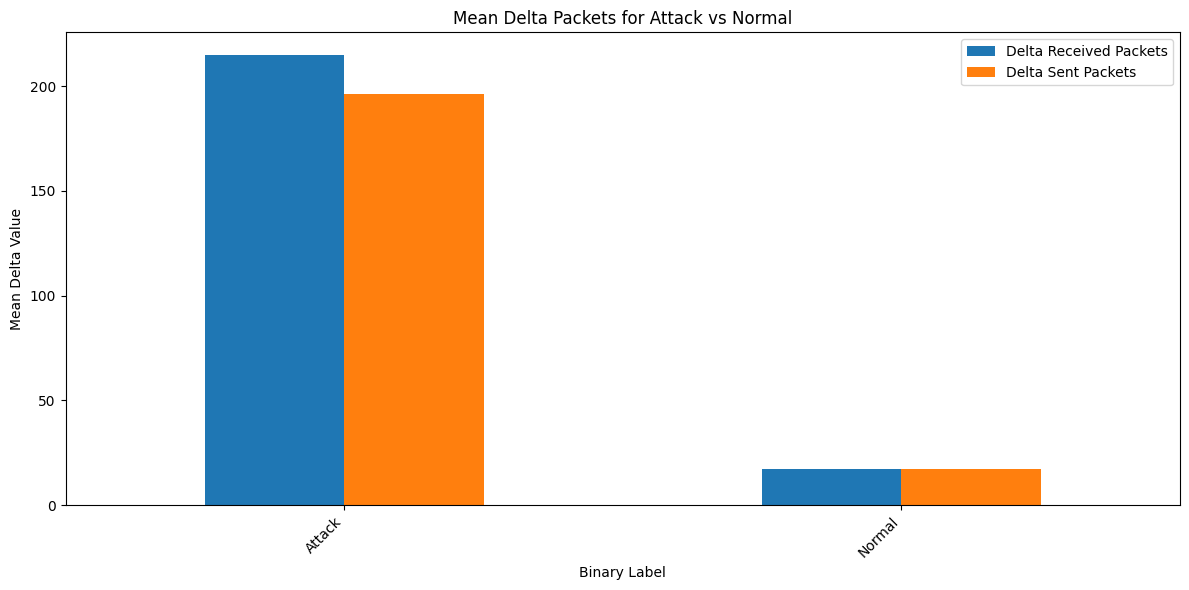

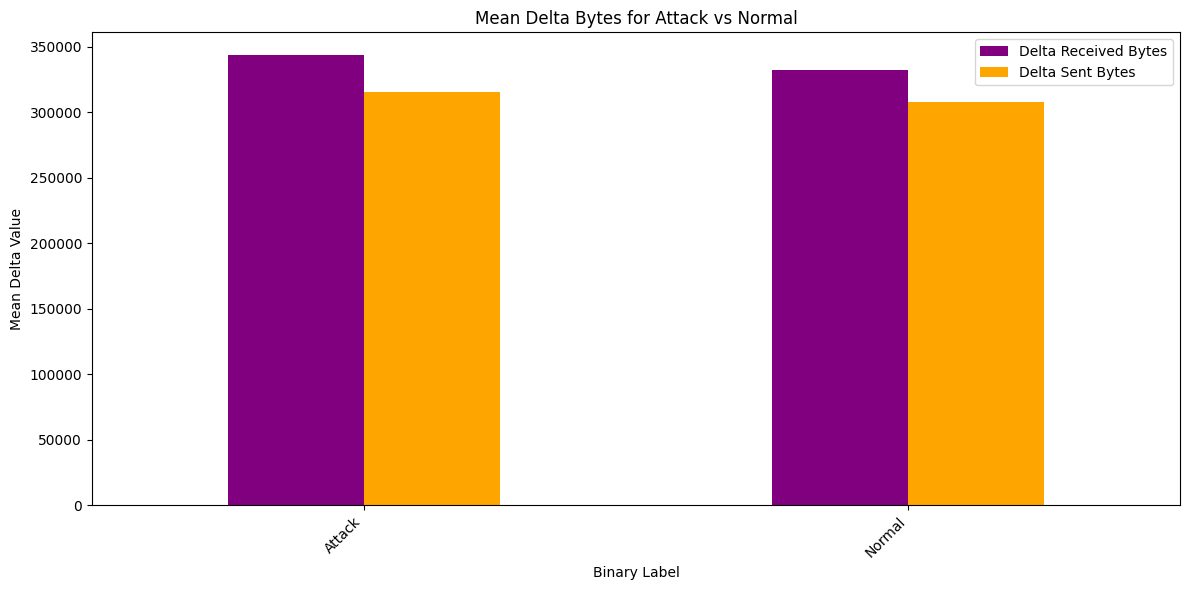

,Delta Received Packets,Delta Sent Packets,Delta Received Bytes,Delta Sent Bytes,Port alive Duration (S)
Binary Label,,,,,
Attack,214.904156,196.142904,343875.664606,315258.635769,801.970539
Normal,17.129870,17.073416,332219.217864,307861.014577,1884.002915


In [35]:
# Investigating anomaly patterns using Binary Label and Delta metrics
anomaly_analysis = dataset.groupby('Binary Label').agg({
    'Delta Received Packets': 'mean',
    'Delta Sent Packets': 'mean',
    'Delta Received Bytes': 'mean',
    'Delta Sent Bytes': 'mean',
    'Port alive Duration (S)': 'mean'
}).sort_values(by='Delta Received Packets', ascending=False)

# Visualizing mean Delta metrics for Attack vs Normal
anomaly_analysis[['Delta Received Packets', 'Delta Sent Packets']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Mean Delta Packets for Attack vs Normal")
plt.ylabel("Mean Delta Value")
plt.xlabel("Binary Label")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

anomaly_analysis[['Delta Received Bytes', 'Delta Sent Bytes']].plot(
    kind='bar', figsize=(12, 6), color=['purple', 'orange']
)
plt.title("Mean Delta Bytes for Attack vs Normal")
plt.ylabel("Mean Delta Value")
plt.xlabel("Binary Label")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

anomaly_analysis


Rata-rata Metrik Delta:
### Attack:
- Delta Received Packets: 214.9
- Delta Sent Packets: 196.1
- Delta Received Bytes: 343,875
- Delta Sent Bytes: 315,258
- Port alive Duration (S): 802 detik.
### Normal:
- Delta Received Packets: 17.1
- Delta Sent Packets: 17.1
- Delta Received Bytes: 332,219
- Delta Sent Bytes: 307,861
- Port alive Duration (S): 1,884 detik.
### Observasi:
- Delta Packets (Received dan Sent) jauh lebih tinggi pada lalu lintas Attack dibandingkan Normal, menunjukkan pola lonjakan lalu lintas saat terjadi serangan.
- Delta Bytes lebih mirip antara Attack dan Normal, tetapi masih sedikit lebih tinggi untuk serangan.
- Durasi port aktif rata-rata lebih pendek untuk serangan dibandingkan lalu lintas normal.

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D